In [1]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
from tqdm import tqdm

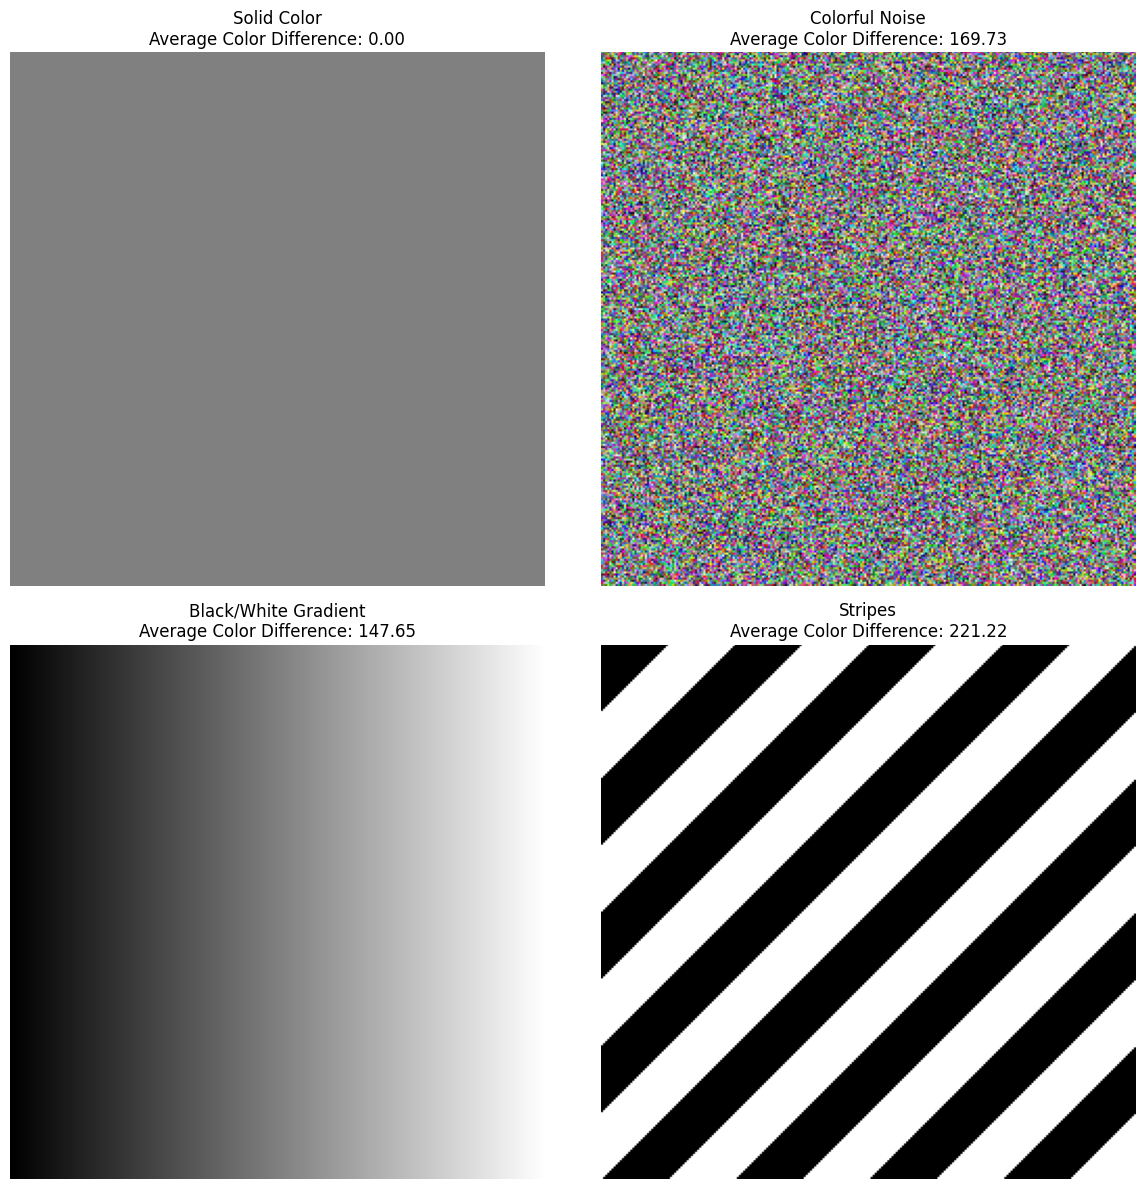

In [11]:
import numpy as np
import matplotlib.pyplot as plt

def average_color_difference(image, num_samples=100000):
    """
    Estimate the average color difference between pixel colors in an RGB image using Monte Carlo sampling.

    Parameters:
        image (np.ndarray): Input image as a NumPy array of shape (height, width, 3).
        num_samples (int): Number of random pixel pairs to sample.

    Returns:
        float: Estimated average color difference.
    """
    height, width, _ = image.shape
    # Generate random indices for the first set of pixels
    y1 = np.random.randint(0, height, size=num_samples)
    x1 = np.random.randint(0, width, size=num_samples)
    # Generate random indices for the second set of pixels
    y2 = np.random.randint(0, height, size=num_samples)
    x2 = np.random.randint(0, width, size=num_samples)
    # Extract pixel colors and convert to float32 for computation
    color1 = image[y1, x1].astype(np.float32)
    color2 = image[y2, x2].astype(np.float32)
    # Compute Euclidean distances between color pairs
    diff = np.linalg.norm(color1 - color2, axis=1)
    # Calculate the average color difference
    avg_diff = np.mean(diff)
    return avg_diff

# Set image dimensions
height, width = 256, 256

# Generate a solid color image (gray)
solid_color = np.full((height, width, 3), fill_value=128, dtype=np.uint8)

# Generate a colorful noise image
colorful_noise = np.random.randint(0, 256, size=(height, width, 3), dtype=np.uint8)

# Generate a black/white gradient image
gradient = np.linspace(0, 255, width, dtype=np.uint8)
gradient_image = np.tile(gradient, (height, 1))
gradient_image = np.stack((gradient_image,)*3, axis=-1)

# Generate a checkerboard image
tile_size = 32
checkerboard = np.indices((height, width)).sum(axis=0) // tile_size % 2
checkerboard = checkerboard * 255
checkerboard = np.stack((checkerboard,)*3, axis=-1).astype(np.uint8)

# Compute average color differences
avg_diff_solid = average_color_difference(solid_color)
avg_diff_noise = average_color_difference(colorful_noise)
avg_diff_gradient = average_color_difference(gradient_image)
avg_diff_checkerboard = average_color_difference(checkerboard)

# Plot images along with their average color difference scores
fig, axs = plt.subplots(2, 2, figsize=(12, 12))

# Solid Color Image
axs[0, 0].imshow(solid_color)
axs[0, 0].set_title(f'Solid Color\nAverage Color Difference: {avg_diff_solid:.2f}')
axs[0, 0].axis('off')

# Colorful Noise Image
axs[0, 1].imshow(colorful_noise)
axs[0, 1].set_title(f'Colorful Noise\nAverage Color Difference: {avg_diff_noise:.2f}')
axs[0, 1].axis('off')

# Black/White Gradient Image
axs[1, 0].imshow(gradient_image)
axs[1, 0].set_title(f'Black/White Gradient\nAverage Color Difference: {avg_diff_gradient:.2f}')
axs[1, 0].axis('off')

# Checkerboard Image
axs[1, 1].imshow(checkerboard)
axs[1, 1].set_title(f'Checkerboard\nAverage Color Difference: {avg_diff_checkerboard:.2f}')
axs[1, 1].axis('off')

plt.tight_layout()
plt.show()
